# Visualisation - t-SNE and classification - neural networks

In this notebook, the MNIST dataset will be visualized with the algorithm t-SNE and neural networks.

* 0.5P for visualizing the samples
* 2P for tSNE
* 1P for applying NN
* 1P achieving an accuracy higher than 98%
* 0.5P Bonus points

## MNIST

First, load the MNIST dataset by calling [``fetch_openml(name="mnist_784", return_X_y=True)``](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) of sklearn. In the meantime, get some information about the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

In [93]:
# YOUR CODE HERE
from sklearn import datasets

mnist = datasets.fetch_openml(name="mnist_784", return_X_y=True, parser="auto")

### Visualize multiple samples of the dataset.

* Split the dataset in X, y 
* Extract one sample of the dataset e.g. ``iloc[idx].values``
* Use the function ``reshape`` to create the shape of an image (28x28 pixel).
* Use ``matplotlib.pyplot.imshow`` to visualize the image.

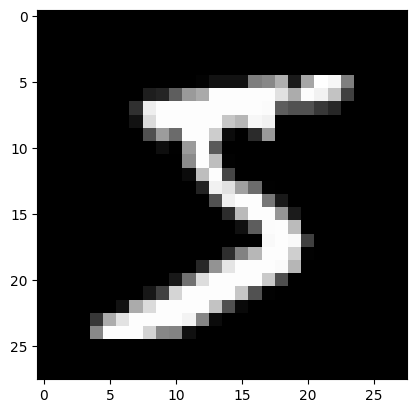

In [103]:
import matplotlib.pyplot as plt

X, y = mnist
first_image = X.iloc[0].values

image_28x28 = first_image.reshape((28, 28))
plt.imshow(image_28x28, cmap="gray")
plt.show()

### Visualize the dataset 

Apply ``TSNE`` of sklearn.manifold with the default parameters on the dataset and visualize the result. Hint: If the processing time takes too long on your computer, you can use a subset.

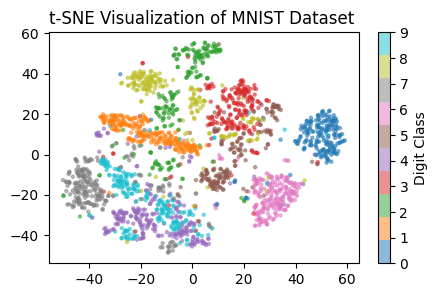

In [95]:
from sklearn.base import np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

seed = 1999

def plot_tsne(X_tsne, classes, appended_title=""):
  plt.figure(figsize=(5, 3))
  scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=classes, cmap='tab10', s=5, alpha=0.5)
  plt.title(f't-SNE Visualization of MNIST Dataset {appended_title}')
  plt.colorbar(scatter, ticks=range(10), label='Digit Class')
  plt.show()


tsne = TSNE(random_state=seed)
X_k, y_k = X[:2000], y[:2000]
X_tsne = tsne.fit_transform(X_k)
classes = y_k.values.astype(int)

plot_tsne(X_tsne, classes)

### Study the convergence of the algorithm

Set the perplexity parameter to 25 and try the following values for the maximum number of iterations: 250, 400, 750 and 1000. Visualize the results for each choice and describe what changes.

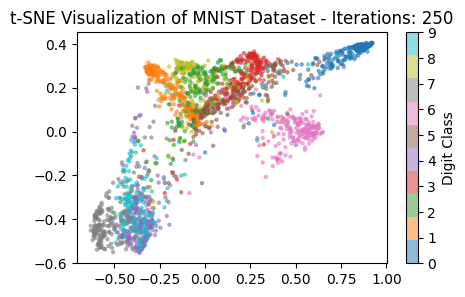

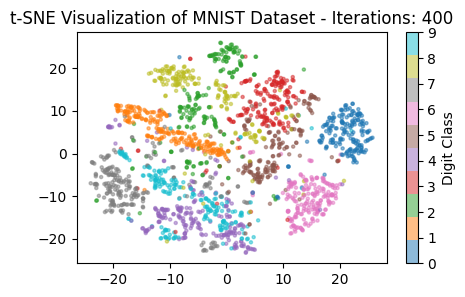

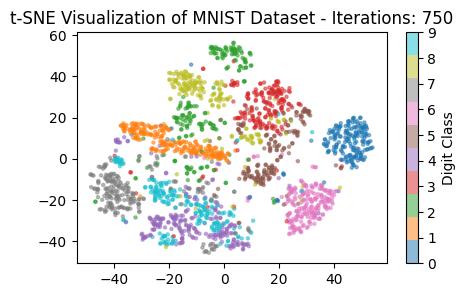

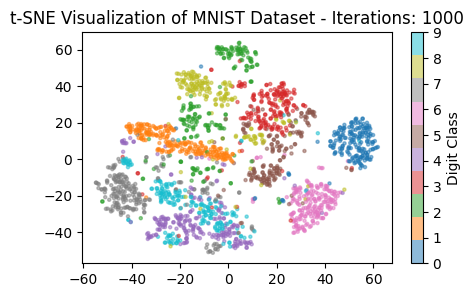

In [87]:
iterations = [250, 400, 750, 1000]


tsne = TSNE(random_state=seed, perplexity=25, n_iter=250)
X_tsne = tsne.fit_transform(X_k)

for n_iter in iterations:
    tsne = TSNE(random_state=seed, perplexity=25, n_iter=n_iter)
    X_tsne = tsne.fit_transform(X_k)
    
    plot_tsne(X_tsne, classes, f'- Iterations: {n_iter}')

### Select the perplexity.

Try at least six different values for the perplexity parameter. Visualize the results and explain which method you think produces the best results.

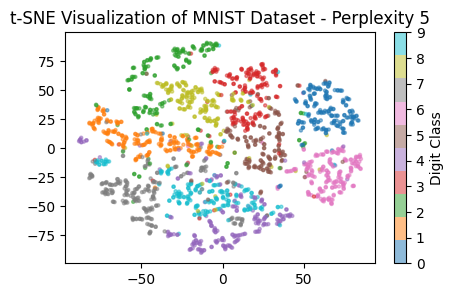

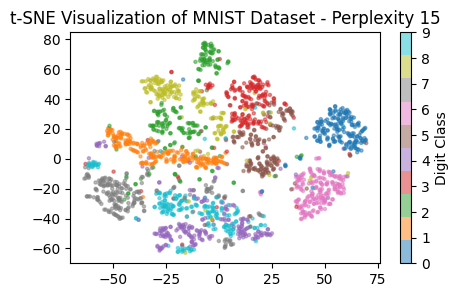

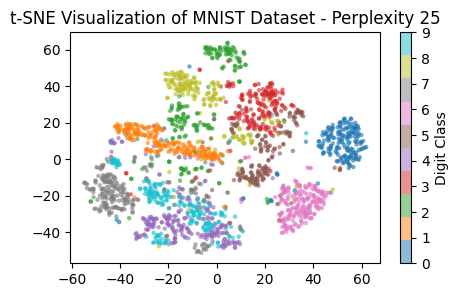

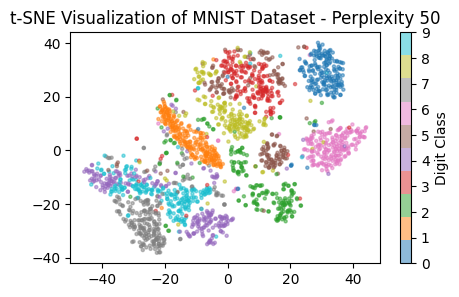

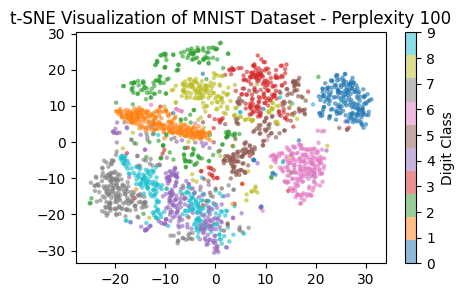

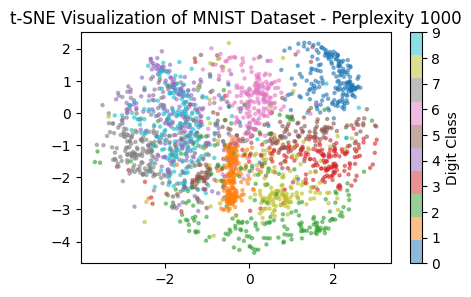

In [86]:
perplexity_vals = [5, 15, 25, 50, 100, 1000]

for perplexity in perplexity_vals:
  tsne = TSNE(perplexity=perplexity, random_state=seed)
  X_tsne = tsne.fit_transform(X_k)
  plot_tsne(X_tsne, classes, f'- Perplexity {perplexity}')

### Assess the stability

Run the algorithm three times with the same parameters of your choice and describe what changes.

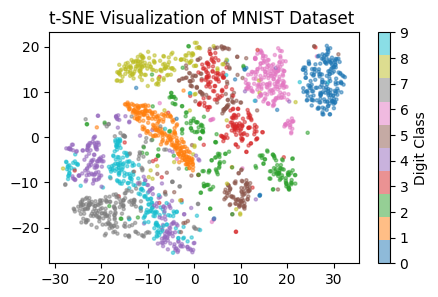

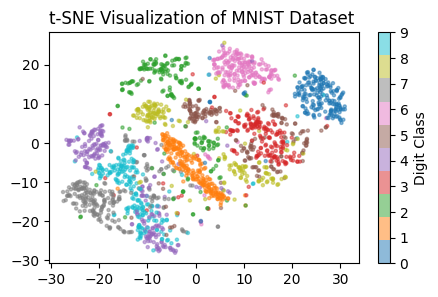

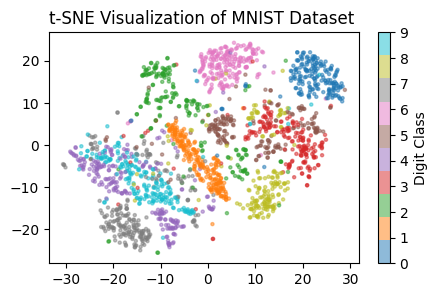

The outcome on every run is different as t-SNE is inherently stochastic. It includes some randomness at the intitialization step.


In [90]:
# YOUR CODE HERE
perplexity = 50 
n_iter = 500

for i in range(3):
  tsne = TSNE(perplexity=perplexity, n_iter=n_iter)
  X_tsne = tsne.fit_transform(X_k)

  plot_tsne(X_tsne, classes)

print("The outcome on every run is different as t-SNE is inherently stochastic. It includes some randomness at the intitialization step.")

### Create a train and test dataset of the MNIST dataset.

The train dataset should consist of 60.000 samples and the dataset of 10.000 samples.

In [105]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=seed)

### Train neural network and evaluate it by measuring the accuracy based on the test dataset.

* Scale the features to be in the range [0,1]. 
* Train the model with [``from sklearn.neural_network import MLPClassifier``](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
* Try to achieve an accuracy of more than 98% on the test set.

In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, alpha=0.1, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

if accuracy > 0.98:
    print("accuracy > 98%")
else:
    print("accuracy <= 98%")

Accuracy on the test set: 98.13%
accuracy > 98%


### Apply a Convolutional Neural Network on the dataset (Bonus Points!)

Tutorial [CNN on MNIST](https://medium.com/@jaredmcmullen1/developing-a-simple-cnn-for-mnist-f98c38f0d38d)

Can you achieve a higher accuracy with Convolutional Neural Network than with the MPLclassifier?